In [8]:
from collections import defaultdict
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## read data to numpy(not in use)

In [385]:
# def readCsvToNumpy(file_name, feat_num):
#     util_mat = []
#     with open(file_name, newline='', encoding='utf-8') as csvfile:
#         next(csvfile, None)
#         rd = csv.reader(csvfile, delimiter=' ', quotechar='|')
#         for idx, row in enumerate(rd):
#             row = (' '.join(row))
#             row = row.split(',')
#             if len(row) == feat_num:
#                 util_mat.append(row)
                
#     # convert 2d list to 2d numpy array
#     for idx, row in enumerate(util_mat):
#         util_mat[idx] = np.asarray(row)
#     util_mat = np.asarray(util_mat)
    
#     return util_mat


# def getPlayerMatrix(util_mat, left_idx, right_idx):
#     player_mat = util_mat[:, left_idx:right_idx]
#     player_mat = player_mat.astype(int)
#     return player_mat
    
    

# def getTeamMatrix(util_mat, player_mat, team_idx):
#     hashmap = defaultdict(list)
#     for idx, item in enumerate(util_mat):
#         hashmap[util_mat[idx, team_idx]].append(player_mat[idx, :])

#     team_mat = []
# #     print('Team number', len(hashmap))
#     for key, value in hashmap.items():
#         team_avr = [sum(x)/len(value) for x in zip(*value)]
#         team_mat.append(team_avr)
#     #     team_mat.append((key, temp))
# #     for idx, item in enumerate(team_mat):
# #         if item[0] == 'Arsenal':
# #             print(idx, item)

#     # convert team feature matrix to numpy matrix
#     for idx, row in enumerate(team_mat):
#         team_mat[idx] = np.asarray(row, dtype=int)
#     team_mat = np.asarray(team_mat, dtype=int);
    
#     return team_mat
    


    
# if __name__ == "__main__":
#     util_mat = readCsvToNumpy('data_clean.csv', 74)
#     # print(util_mat.shape, util_mat)
#     player_mat = getPlayerMatrix(util_mat, 44, 73)
#     # print(player_mat.shape, player_mat)
#     team_mat = getTeamMatrix(util_mat, player_mat, 6)

# #     print(team_mat[0, :])

#     res = np.dot(player_mat, np.transpose(team_mat))
# #     # print(hashmap['FC Barcelona'])

# #     print(res[0,:])

## read data to pandas Data frame

In [55]:

util_df = pd.read_csv('data_clean.csv', na_filter=False)
# print(util_df)
player_df = util_df.iloc[:, 44:73]
# print(player_df)
team_df = util_df.groupby('Club', sort=False).mean()
# print(team_df)
team_df = team_df.iloc[:, 37:66]
# print(team_df)

res = np.dot(player_df, np.transpose(team_df))

#     print(res[0, :])


# res[0, :]

In [53]:
util_df.iloc[:,1]

0                    L. Messi
1           Cristiano Ronaldo
2                   Neymar Jr
3                K. De Bruyne
4                   E. Hazard
5            L. Modri<U+0107>
6                   L. Suárez
7                Sergio Ramos
8              R. Lewandowski
9                    T. Kroos
10                   D. Godín
11                David Silva
12                   N. Kanté
13                  P. Dybala
14                    H. Kane
15               A. Griezmann
16            Sergio Busquets
17                  E. Cavani
18                  S. Agüero
19               G. Chiellini
20                  K. Mbappé
21                   M. Salah
22                   Casemiro
23               J. Rodríguez
24                 L. Insigne
25                       Isco
26                 C. Eriksen
27                   Coutinho
28              P. Aubameyang
29                 M. Hummels
                 ...         
16092             Y. Uchimura
16093                R. Takae
16094     

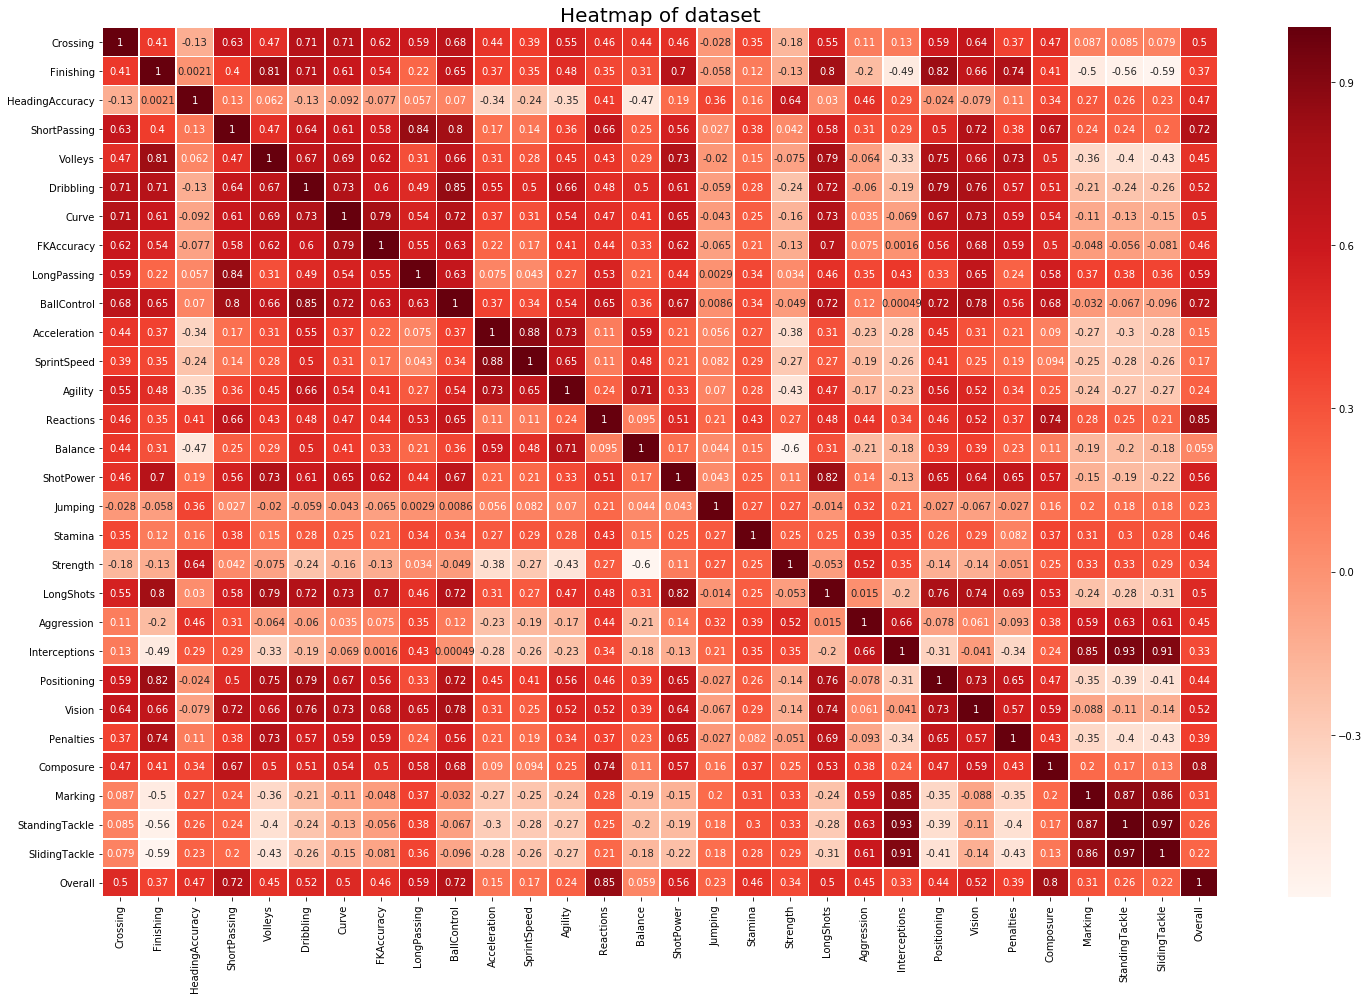

In [54]:

# util_df.describe()
player_characteristics = ['Crossing','Finishing', 'HeadingAccuracy', 
                          'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                          'FKAccuracy', 'LongPassing', 'BallControl', 
                          'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 
                          'Balance', 'ShotPower', 'Jumping', 'Stamina', 
                          'Strength', 'LongShots', 'Aggression',
                          'Interceptions', 'Positioning', 'Vision', 
                          'Penalties', 'Composure', 'Marking', 'StandingTackle', 
                          'SlidingTackle']

plt.figure(figsize= (25, 16))


hm=sns.heatmap(util_df.loc[:, player_characteristics + ['Overall']].corr(), annot = True, linewidths=.5, cmap='Reds')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

# corr_matrix = util_df.corr()
# corr_matrix.loc[player_characteristics, 'LB'].sort_values(ascending=False).head()